# **1. Installing Library**


In [1]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-optimize in e:\anaconda\lib\site-packages (0.10.2)



# **2. Import Library**


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime,timedelta
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier


# **3. Load Dataset**


In [3]:
df = pd.read_csv('dataset\irradiance_dataset')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Acer\AppData\Local\Temp\ipykernel_15840\1717908015.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('dataset\irradiance_dataset')


,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time,hour,dayofweek,quarter,month,year,dayofyear,cluster,distance_to_centroid,is_outlier
0,0.0,91.01,15.32,19.39,2022032700,0,6,1,3,2022,86,1,0.528091,False
1,0.0,90.96,15.18,19.24,2022032701,1,6,1,3,2022,86,1,0.390174,False
2,0.0,90.93,14.88,18.99,2022032702,2,6,1,3,2022,86,1,0.259482,False
3,0.0,90.92,14.68,18.72,2022032703,3,6,1,3,2022,86,1,0.155451,False
4,0.0,90.95,14.48,18.50,2022032704,4,6,1,3,2022,86,1,0.150793,False


# **4. Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ALLSKY_SFC_SW_DWN     20544 non-null  float64
 1   PS                    20544 non-null  float64
 2   QV2M                  20544 non-null  float64
 3   T2M                   20544 non-null  float64
 4   time                  20544 non-null  int64  
 5   hour                  20544 non-null  int64  
 6   dayofweek             20544 non-null  int64  
 7   quarter               20544 non-null  int64  
 8   month                 20544 non-null  int64  
 9   year                  20544 non-null  int64  
 10  dayofyear             20544 non-null  int64  
 11  cluster               20544 non-null  int64  
 12  distance_to_centroid  20544 non-null  float64
 13  is_outlier            20544 non-null  bool   
dtypes: bool(1), float64(5), int64(8)
memory usage: 2.1 MB


In [5]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time,hour,dayofweek,quarter,month,year,dayofyear,cluster,distance_to_centroid,is_outlier,datetime
0,0.0,91.01,15.32,19.39,2022032700,0,6,1,3,2022,86,1,0.528091,False,2022-03-27 00:00:00
1,0.0,90.96,15.18,19.24,2022032701,1,6,1,3,2022,86,1,0.390174,False,2022-03-27 01:00:00
2,0.0,90.93,14.88,18.99,2022032702,2,6,1,3,2022,86,1,0.259482,False,2022-03-27 02:00:00
3,0.0,90.92,14.68,18.72,2022032703,3,6,1,3,2022,86,1,0.155451,False,2022-03-27 03:00:00
4,0.0,90.95,14.48,18.50,2022032704,4,6,1,3,2022,86,1,0.150793,False,2022-03-27 04:00:00


In [6]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN','hour','dayofweek','month','year','dayofyear','quarter']]
new_df = new_df.set_index('datetime')
new_df

,ALLSKY_SFC_SW_DWN,hour,dayofweek,month,year,dayofyear,quarter
datetime,,,,,,,
2022-03-27 00:00:00,0.0,0,6,3,2022,86,1
2022-03-27 01:00:00,0.0,1,6,3,2022,86,1
2022-03-27 02:00:00,0.0,2,6,3,2022,86,1
2022-03-27 03:00:00,0.0,3,6,3,2022,86,1
2022-03-27 04:00:00,0.0,4,6,3,2022,86,1
...,...,...,...,...,...,...,...
2024-07-29 19:00:00,0.0,19,0,7,2024,211,3
2024-07-29 20:00:00,0.0,20,0,7,2024,211,3
2024-07-29 21:00:00,0.0,21,0,7,2024,211,3


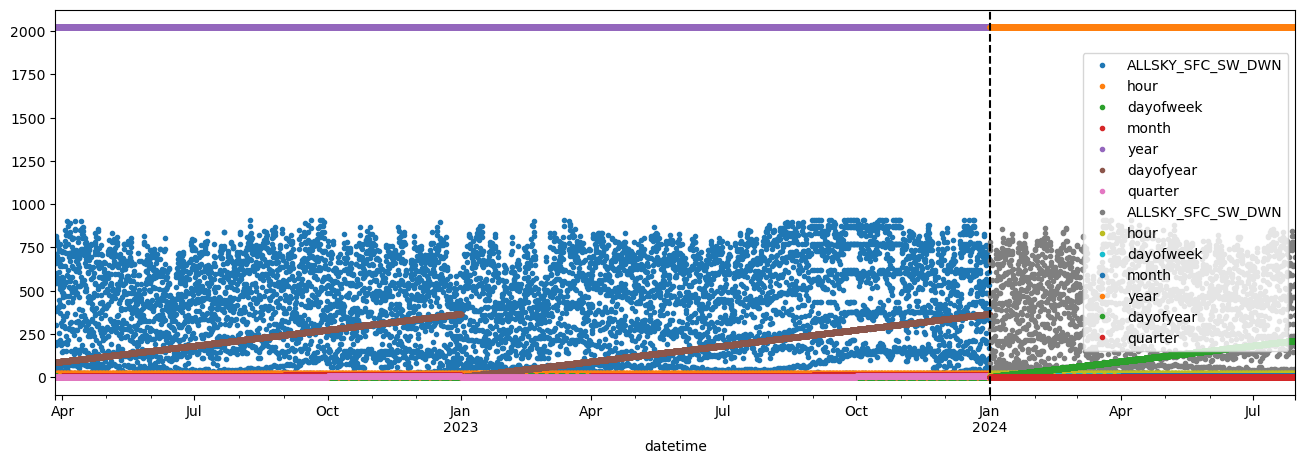

In [7]:
train = new_df.loc[new_df.index < '01-01-2024 00:00:00']
test = new_df.loc[new_df.index >= '01-01-2024 00:00:00']

fig, ax = plt.subplots(figsize=(16,5))
train.plot(ax=ax , label='train',style='.')
test.plot(ax=ax, label='test',style='.')
ax.axvline('01-01-2024',color='black',ls='--')
plt.show()

# **5. Building Regresion Model**

In [8]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = 'ALLSKY_SFC_SW_DWN'

x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [9]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = rf_regressor.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 5307.576826585301
R-squared: 0.9260698971067535


# **6. Hyperparameter Using BayesSearch**

In [12]:
param_grid = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
}
opt = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=param_grid,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [13]:
opt.fit(x_train, y_train)
print(opt.best_estimator_)


RandomForestRegressor(max_depth=11, min_samples_leaf=20, n_estimators=300,
                      random_state=42)


In [14]:
y_pred_bayes = opt.predict(x_test)
y_pred_bayes

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
bayes_mse = mean_squared_error(y_test, y_pred_bayes)
bayes_r2 = r2_score(y_test, y_pred_bayes)

print('Mean Squared Error:', bayes_mse)
print('R-squared:', bayes_r2)

Mean Squared Error: 4156.782187658697
R-squared: 0.9420995032423988


In [18]:
test['prediction1'] = y_pred
test['prediction_beyes'] = y_pred_bayes
last_df = new_df.merge(test['prediction1'], how='left', left_index=True, right_index=True)
last_df = last_df.merge(test['prediction_beyes'], how='left', left_index=True, right_index=True)
last_df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15840\3310411478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction1'] = y_pred
C:\Users\Acer\AppData\Local\Temp\ipykernel_15840\3310411478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction_beyes'] = y_pred_bayes


,ALLSKY_SFC_SW_DWN,hour,dayofweek,month,year,dayofyear,quarter,prediction1,prediction_beyes
datetime,,,,,,,,,
2022-03-27 00:00:00,0.0,0,6,3,2022,86,1,NaN,NaN
2022-03-27 01:00:00,0.0,1,6,3,2022,86,1,NaN,NaN
2022-03-27 02:00:00,0.0,2,6,3,2022,86,1,NaN,NaN
2022-03-27 03:00:00,0.0,3,6,3,2022,86,1,NaN,NaN
2022-03-27 04:00:00,0.0,4,6,3,2022,86,1,NaN,NaN


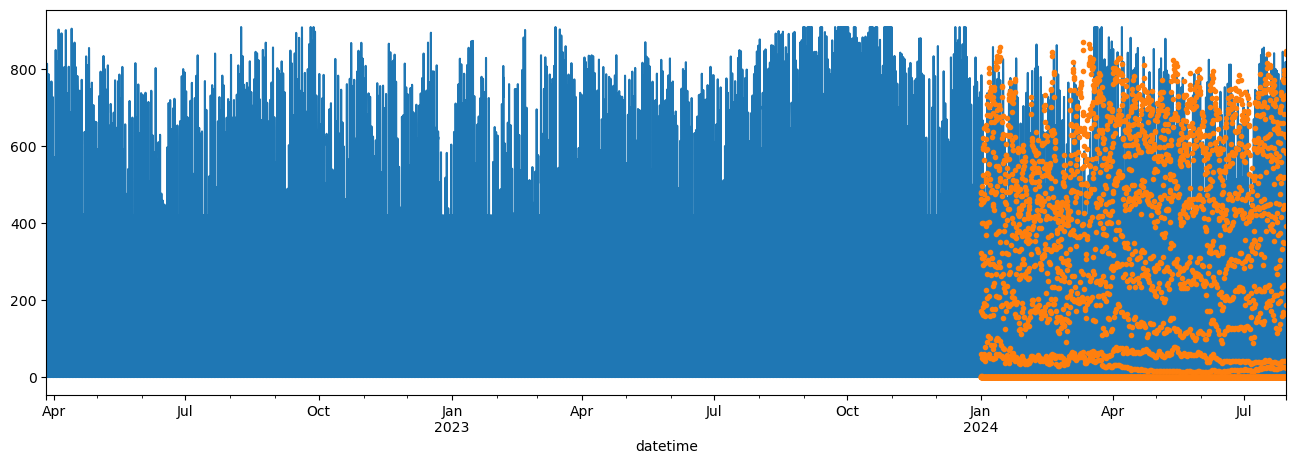

In [23]:
ax = last_df['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df['prediction1'].plot(ax=ax, style='.')
plt.show()

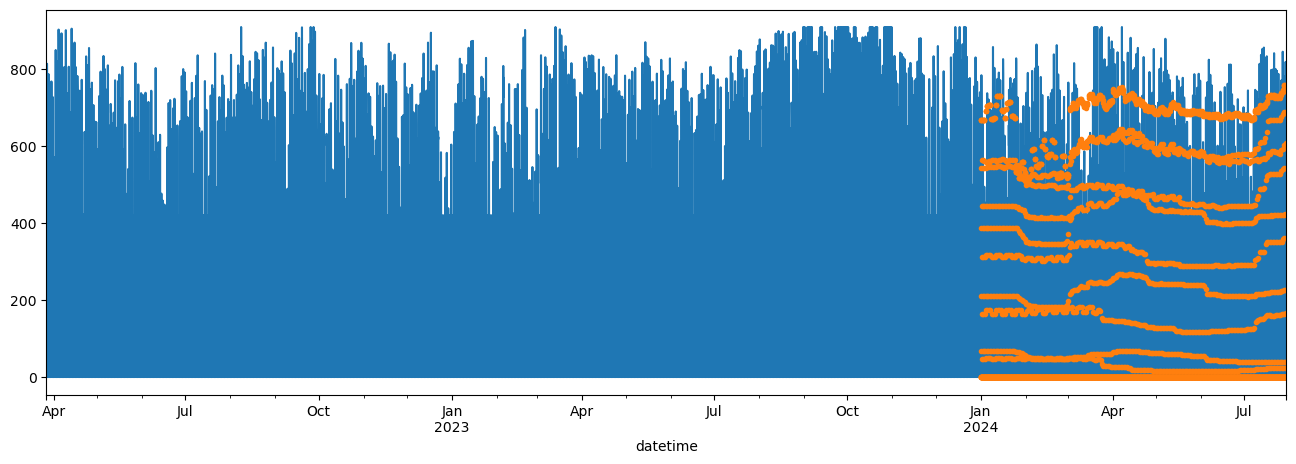

In [25]:
ax = last_df['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df['prediction_beyes'].plot(ax=ax, style='.')
plt.show()

# **7. compare models before and after hyperparameters**

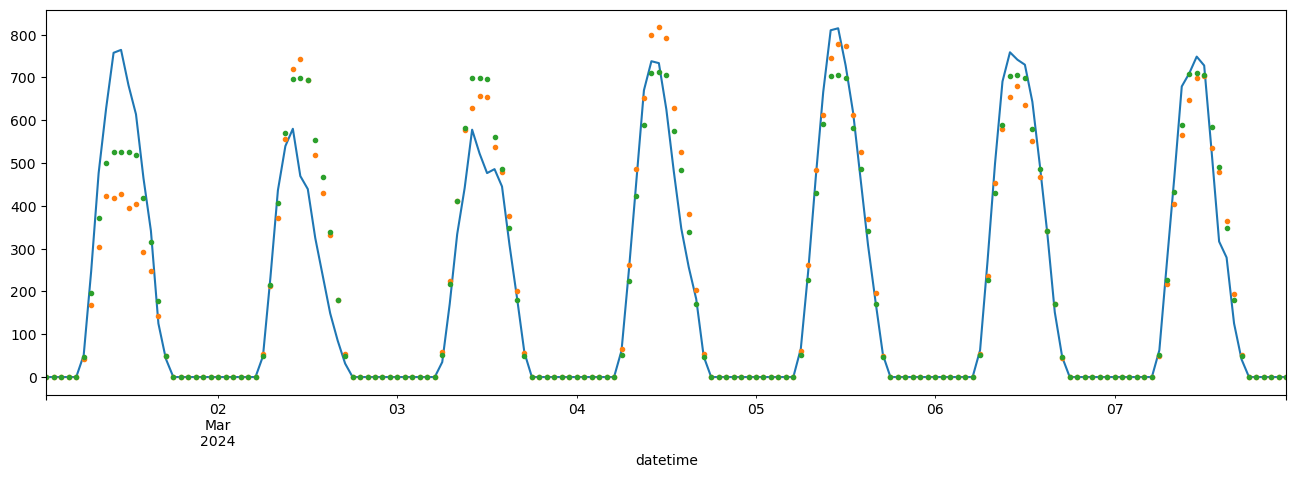

In [26]:
ax = last_df.loc[(last_df.index > '03-01-2024') & (last_df.index < '03-08-2024')]['ALLSKY_SFC_SW_DWN'].plot(figsize=(16,5))
last_df.loc[(last_df.index > '03-01-2024') & (last_df.index < '03-08-2024')]['prediction1'].plot(ax=ax, style='.')
last_df.loc[(last_df.index > '03-01-2024') & (last_df.index < '03-08-2024')]['prediction_beyes'].plot(ax=ax, style='.')
plt.show()

# **8. Saving Model Evaluation**

In [27]:
evaluation = pd.DataFrame ({    
    'model' : ['Randomforest', 'Randomforest BayesSearchCV'],
    'r2_score' : [r2, bayes_r2],
    'Mean Squared Error' : [mse, bayes_mse],
    })
evaluation

,model,r2_score,Mean Squared Error
0,Randomforest,0.92607,5307.576827
1,Randomforest BayesSearchCV,0.94210,4156.782188


In [28]:
evaluation.to_csv('Evaluation_Model_Score', encoding='utf-8', index=False)